# (1) ルンゲクッタ法を用いてBloch方程式を解く

## ライブラリを用いる

In [111]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import math
from mpl_toolkits.mplot3d import Axes3D

# parameters
PI = 3.1415926
TR = 100
gamma = 2e0*PI*42.58*1000      #[rad/(ms.T)]
t1 = 250      #[ms]   #The values of T1 were assumed to be uniform and values in general fat were adopted.
t2 = 60       #[ms]   #The values of T2 were assumed to be uniform and values in general fat were adopted.
bx = 0.0
by = 0.0
bz = 10.0   # gradient magnetic field in y direction
alpha = 30
pd = 100.0
m0 = pd     # m0 -> 

# initial m
mx_init = 0.0
my_init = pd * math.sin(math.radians(alpha))
mz_init = pd * math.cos(math.radians(alpha))
m_init = [mx_init, my_init, mz_init]


# preparation of calculation
dx = 2   # 256[mm] / 128[pixel]
dy = 2   # 256[mm] / 128[pixel]
gx = 5
gy = 5
bz = gx + gy
FOV = [256, 256]
timeInterval = 1e-2   #[ms]
omega = (2*PI/FOV[0] + 2*PI/FOV[1])*bz


# bloch equation
def Bloch(t, m, t1, t2, m0, omega):
    mx = m[0]
    my = m[1]
    mz = m[2]
    dmxdt = omega*my - mx/t2
    dmydt = -omega*mx - my/t2
    dmzdt = - (mz-m0)/t1
    dmdt = np.hstack([dmxdt, dmydt, dmzdt])
    return dmdt



In [112]:
# preparation of numerical calculations
t_min = 0
t_max = TR
dt = 1e-2
t = np.arange(t_min, t_max, dt)
t_span = (t_min, t_max)



# numerical calculations
sol = solve_ivp(Bloch, t_span, m_init, method='RK45', t_eval=t, args=(t1, t2, m0, omega,))

In [113]:
print("t.shape:", t.shape)
print(t[0:20])

t.shape: (10000,)
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19]


RK45」(デフォルト): 5(4)次数の陽解法ルンゲクッタ法 [1]. 4次法の精度を仮定して誤差を制御しますが, 5次法の精度の式を使ってステップを踏みます(局所的な外挿を行います). 密な出力には4次補間多項式が使われる[2]。複素数領域で適用可能。


x: (10000,)
y: (10000,)
z: (10000,)
t: (10000,)
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19]


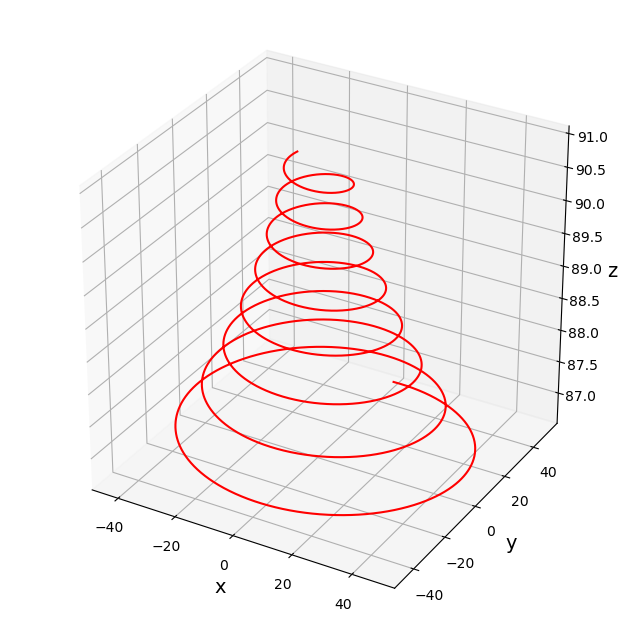

In [114]:
# Figure
fig = plt.figure(figsize = (8, 8))

# 3DAxes
ax = fig.add_subplot(111, projection='3d')

# ax label
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

t_value = sol.t
x_value = sol.y[0,]
y_value = sol.y[1,]
z_value = sol.y[2,]

# plot
ax.plot(x_value, y_value, z_value, color = "red")
print("x:", x_value.shape)
print("y:", y_value.shape)
print("z:", z_value.shape)
print("t:", t_value.shape)
print(t_value[0:20])

In [92]:
x_value.shape


(10000,)

x: (10000,)
y: (10000,)
z: (10000,)
t: (10000,)
[ 0.          0.24539503  0.49070236  0.7359161   0.98103037  1.22603928
  1.47093696  1.71571764  1.96037574  2.20490539  2.44930067  2.69355567
  2.9376645   3.18162126  3.42542007  3.66905508  3.91252042  4.15581023
  4.39891869  4.64183995  4.88456821  5.12709765  5.36942246  5.61153687
  5.85343508  6.09511133  6.33655985  6.5777749   6.81875072  7.05948159
  7.29996178  7.54018559  7.7801473   8.01984122  8.25926168  8.49840299
  8.73725948  8.97582552  9.21409544  9.45206362  9.68972443  9.92707225
 10.16410148 10.40080651 10.63718177 10.87322168 11.10892066 11.34427316
 11.57927364 11.81391655 12.04819637 12.28210757 12.51564465 12.74880211
 12.98157445 13.21395621 13.4459419  13.67752607 13.90870327 14.13946805]


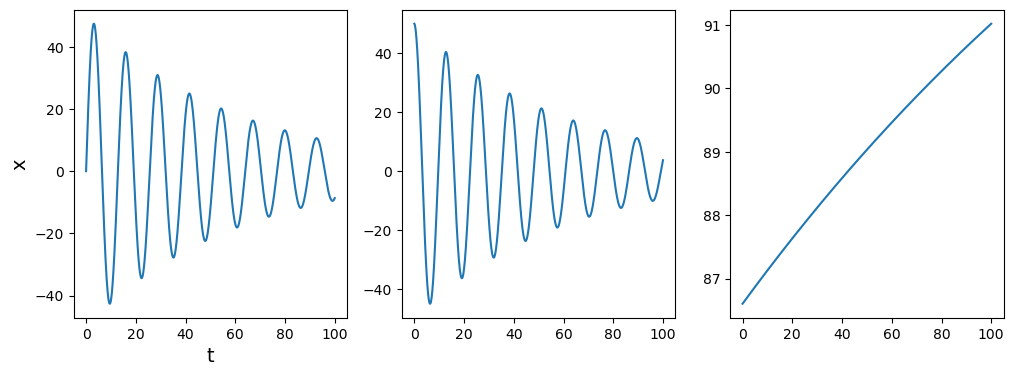

In [93]:
#figure．
fig = plt.figure(figsize = (12, 4))

#add_subplot
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.plot(t_value, x_value)
# ax label
ax1.set_xlabel("t", size = 14)
ax1.set_ylabel("x", size = 14)

ax2.plot(t_value, y_value)
ax3.plot(t_value, z_value)

print("x:", x_value.shape)
print("y:", y_value.shape)
print("z:", z_value.shape)
print("t:", t_value.shape)
print(x_value[0:60])

# (2) Bloch方程式を解析的に解く

In [106]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import math
from mpl_toolkits.mplot3d import Axes3D

# parameters
PI = 3.1415926
TR = 100                       #[ms]
gamma = 2e0*PI*42.58*1000      #[rad/(ms.T)]
t1 = 250       #[ms]   #The values of T1 were assumed to be uniform and values in general fat were adopted.
t2 = 60       #[ms]   #The values of T2 were assumed to be uniform and values in general fat were adopted.
bx = 0.0
by = 0.0
bz = 10.0   # gradient magnetic field in y direction
m0 = 100
alpha = 30
pd = 100.0


# preparation of numerical calculations
t_min = 0
t_max = TR
dt = 1e-2
t = np.arange(t_min, t_max, dt)
t_span = (t_min, t_max)

# initial m
mx_init = 0.0
my_init = pd * math.sin(math.radians(alpha))
mz_init = pd * math.cos(math.radians(alpha))
m_init = [mx_init, my_init, mz_init]

# initialize
sample_time = int(TR / dt)
mx = np.zeros(sample_time)
my = np.zeros(sample_time)
mz = np.zeros(sample_time)

mx[0] = mx_init
my[0] = my_init
mz[0] = mz_init


# preparation of calculation
dx = 2   # 256[mm] / 128[pixel]
dy = 2   # 256[mm] / 128[pixel]
gx = 5
gy = 5
bz = gx + gy
FOV = [256, 256]
timeInterval = 1e-2   #[ms]
phase = 2*PI*gx/FOV[0] + 2*PI*gy/FOV[1]
phase = math.radians(phase)
E1 = math.exp(-timeInterval / t1)
E2 = math.exp(-timeInterval / t2)


# calculation
for i in range(sample_time - 1):
    mx_t = mx[i]
    my_t = my[i]
    mz_t = mz[i]
    
    mx[i + 1] = (mx_t*math.cos(phase) - my_t*math.sin(phase)) * E2
    my[i + 1] = (mx_t*math.sin(phase) + my_t*math.cos(phase)) * E2
    mz[i + 1] = E1*mz_t + (1-E1)*pd
    

    

print("mx:", mx.shape)
print("my:", my.shape)
print("mz:", mz.shape)

print("x:", x_value.shape)
print("y:", y_value.shape)
print("z:", z_value.shape)
print("t:", t_value.shape)


mx: (10000,)
my: (10000,)
mz: (10000,)
x: (10000,)
y: (10000,)
z: (10000,)
t: (10000,)


In [107]:
phase

0.004283682392678845

### plot

x: (10000,)
y: (10000,)
z: (10000,)
t: (10000,)
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19]


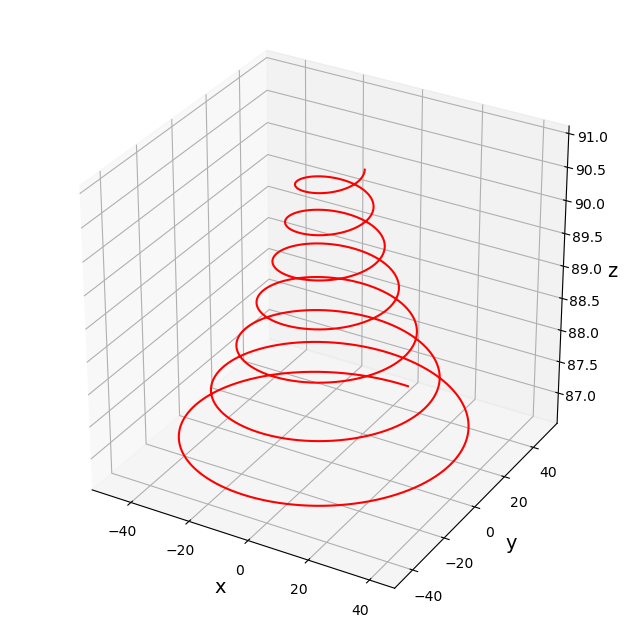

In [108]:
# Figure
fig = plt.figure(figsize = (8, 8))

# 3DAxes
ax = fig.add_subplot(111, projection='3d')

# ax label
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

# each value
t_min = 0
t_max = TR
t = np.arange(t_min, t_max, dt)
t_value = t
x_value = mx
y_value = my
z_value = mz

# plot
ax.plot(x_value, y_value, z_value, color = "red")

print("x:", x_value.shape)
print("y:", y_value.shape)
print("z:", z_value.shape)
print("t:", t_value.shape)
print(t_value[0:20])

In [109]:
x_value.shape

(10000,)

[ 0.         -0.21414777 -0.42822024 -0.64221349 -0.85612362 -1.06994673
 -1.28367891 -1.49731628 -1.71085493 -1.92429098 -2.13762054 -2.35083972
 -2.56394465 -2.77693144 -2.98979622 -3.20253512 -3.41514428 -3.62761982
 -3.8399579  -4.05215465]


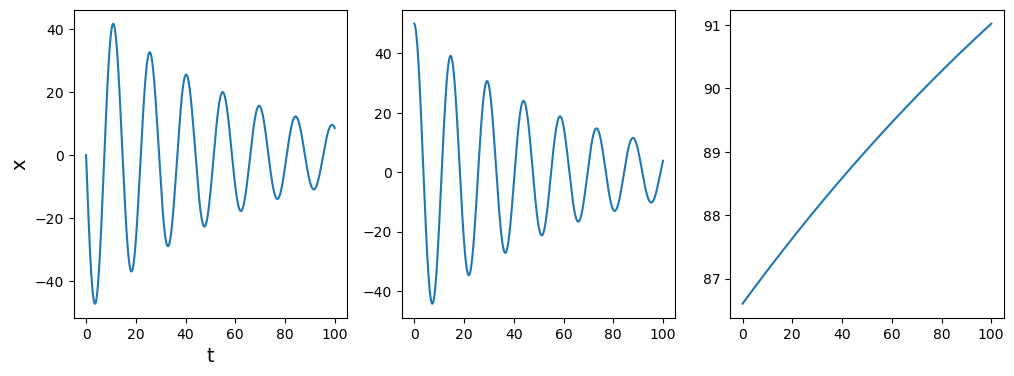

In [110]:
#figure．
fig = plt.figure(figsize = (12, 4))

#add_subplot
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.plot(t_value, x_value)
# ax label
ax1.set_xlabel("t", size = 14)
ax1.set_ylabel("x", size = 14)

ax2.plot(t_value, y_value)
ax3.plot(t_value, z_value)
print(x_value[0:20])

# (3) まとめ => (1)と(2)

### ・準備

In [144]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import math
from mpl_toolkits.mplot3d import Axes3D

# parameters
PI = 3.1415926
TR = 100
gamma = 2e0*PI*42.58*1000      #[rad/(ms.T)]
t1 = 250      #[ms]   #The values of T1 were assumed to be uniform and values in general fat were adopted.
t2 = 60       #[ms]   #The values of T2 were assumed to be uniform and values in general fat were adopted.
bx = 0.0
by = 0.0
bz = 10.0   # gradient magnetic field in y direction
alpha = 30
pd = 100.0
m0 = pd     # m0 -> 
timeInterval = 1e-2   #[ms]
sample_time = int(TR / timeInterval)

dx = 2   # 256[mm] / 128[pixel]
dy = 2   # 256[mm] / 128[pixel]
gx = 5
gy = 5
bz = gx + gy
FOV = [256, 256]
t_min = 0
t_max = TR
t = np.arange(t_min, t_max, timeInterval)
t_eval = np.arange(t_min, t_max, timeInterval)
t_span = (t_min, t_max)


# initial m
mx_init = 0.0
my_init = pd * math.sin(math.radians(alpha))
mz_init = pd * math.cos(math.radians(alpha))
m_init = [mx_init, my_init, mz_init]


# preparation of numerical calculation
#omega = (2*PI/FOV[0] + 2*PI/FOV[1])*bz
omega = (2*PI*gx/FOV[0] + 2*PI*gy/FOV[1]) / timeInterval


# preparation of calculation
phase = 2*PI*gx/FOV[0] + 2*PI*gy/FOV[1]
E1 = math.exp(-timeInterval / t1)
E2 = math.exp(-timeInterval / t2)


# bloch equation
def Bloch(t, m, t1, t2, m0, omega):
    mx = m[0]
    my = m[1]
    mz = m[2]
    dmxdt = omega*my - mx/t2
    dmydt = -omega*mx - my/t2
    dmzdt = - (mz-m0)/t1
    dmdt = np.hstack([dmxdt, dmydt, dmzdt])
    return dmdt


# preparation of analytical calculation 
# initialize
mx_analy = np.zeros(sample_time)
my_analy = np.zeros(sample_time)
mz_analy = np.zeros(sample_time)

mx_analy[0] = mx_init
my_analy[0] = my_init
mz_analy[0] = mz_init


### ・数値解

Text(0.5, 0.92, 'Numerical ')

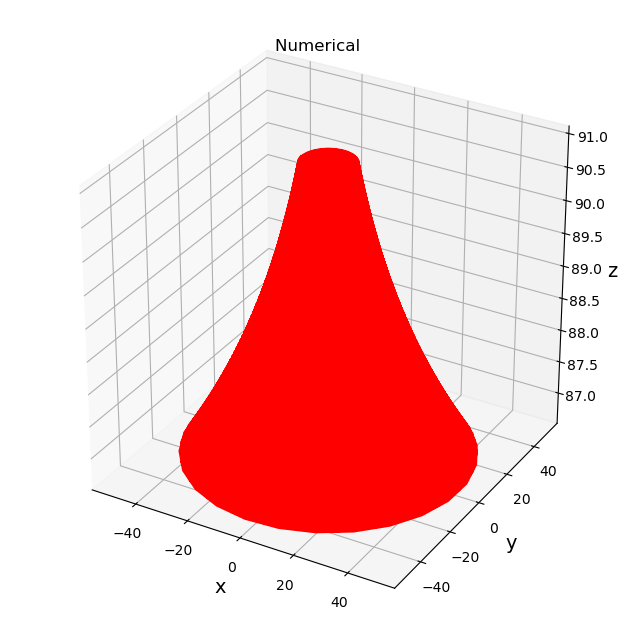

In [145]:
# numerical calculations
sol = solve_ivp(Bloch, t_span, m_init, method='RK45', t_eval=t_eval, args=(t1, t2, m0, omega,))

# visualize
# Figure
fig = plt.figure(figsize = (8, 8))

# 3DAxes
ax = fig.add_subplot(111, projection='3d')

# ax label
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

t_value_numer = sol.t
x_value_numer = sol.y[0,]
y_value_numer = sol.y[1,]
z_value_numer = sol.y[2,]

# plot
ax.plot(x_value_numer, y_value_numer, z_value_numer, color = "red")
plt.title('Numerical ')



Text(0, 0.5, 'z')

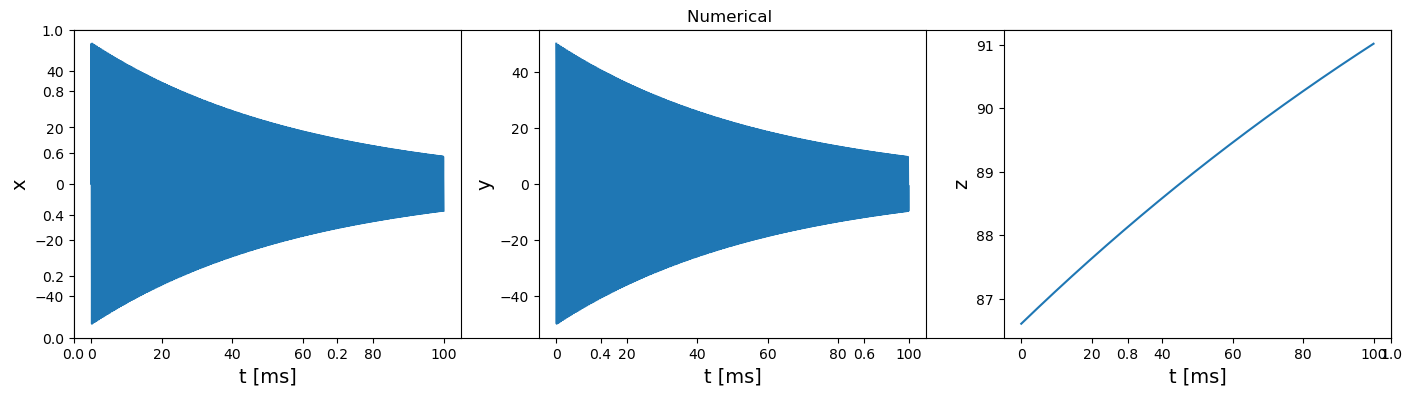

In [146]:
# figure．
fig = plt.figure(figsize = (17, 4))
plt.title('Numerical ')

# add_subplot
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# plot
ax1.plot(t_value_numer, x_value_numer)
ax2.plot(t_value_numer, y_value_numer)
ax3.plot(t_value_numer, z_value_numer)

# ax label
ax1.set_xlabel("t [ms]", size = 14)
ax1.set_ylabel("x", size = 14)
ax2.set_xlabel("t [ms]", size = 14)
ax2.set_ylabel("y", size = 14)
ax3.set_xlabel("t [ms]", size = 14)
ax3.set_ylabel("z", size = 14)



### ・解析解

In [147]:
# analytical solution
for i in range(sample_time - 1):
    mx_t = mx_analy[i]
    my_t = my_analy[i]
    mz_t = mz_analy[i]
    
    mx_analy[i + 1] = (mx_t*math.cos(phase) + my_t*math.sin(phase)) * E2
    my_analy[i + 1] = (-mx_t*math.sin(phase) + my_t*math.cos(phase)) * E2
    mz_analy[i + 1] = E1*mz_t + (1-E1)*pd

Text(0.5, 0.92, 'Analytical ')

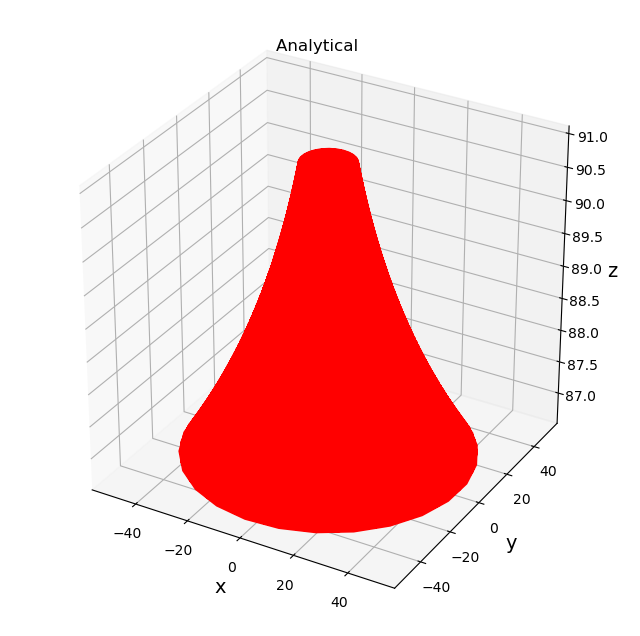

In [148]:
# Figure
fig = plt.figure(figsize = (8, 8))

# 3DAxes
ax = fig.add_subplot(111, projection='3d')

# ax label
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

t_value_analy = t
x_value_analy = mx_analy
y_value_analy = my_analy
z_value_analy = mz_analy

# plot
ax.plot(x_value_analy, y_value_analy, z_value_analy, color = "red")

plt.title('Analytical ')

Text(0, 0.5, 'z')

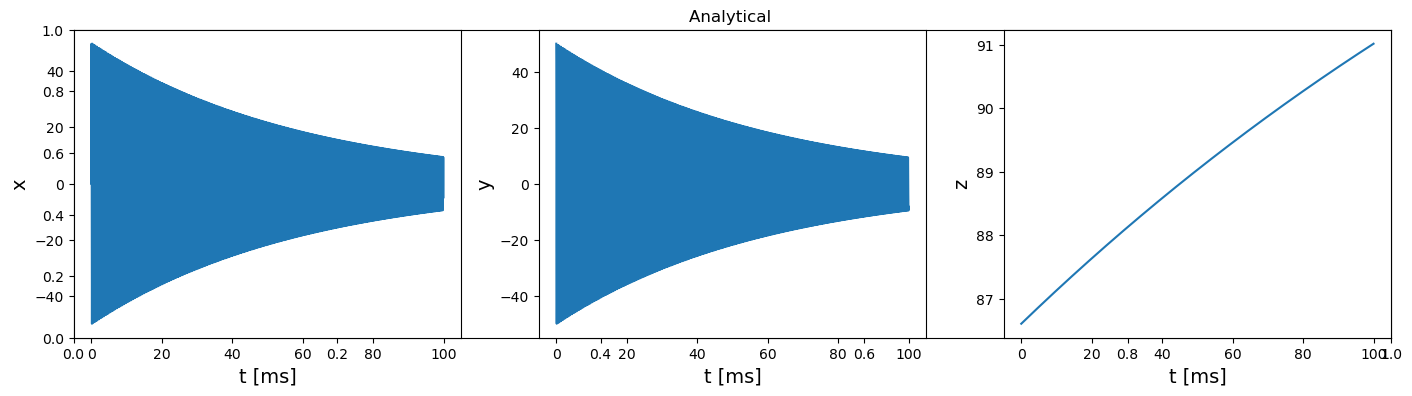

In [149]:
# figure．
fig = plt.figure(figsize = (17, 4))
plt.title('Analytical ')

# add_subplot
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# plot
ax1.plot(t_value_analy, x_value_analy)
ax2.plot(t_value_analy, y_value_analy)
ax3.plot(t_value_analy, z_value_analy)

# ax label
ax1.set_xlabel("t [ms]", size = 14)
ax1.set_ylabel("x", size = 14)
ax2.set_xlabel("t [ms]", size = 14)
ax2.set_ylabel("y", size = 14)
ax3.set_xlabel("t [ms]", size = 14)
ax3.set_ylabel("z", size = 14)




# (4) 数値解と解析解の比較

Text(0, 0.5, 'z difference')

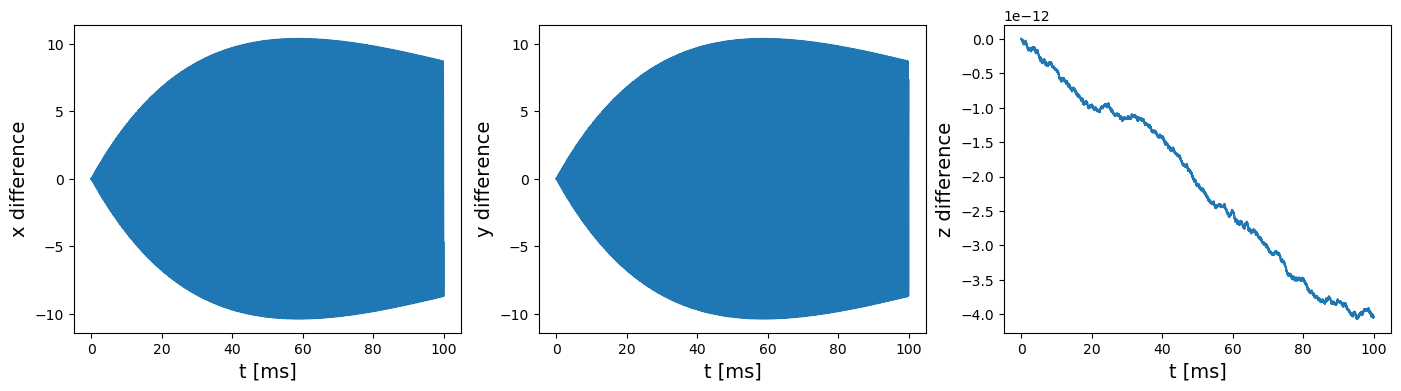

In [150]:
fig = plt.figure(figsize = (17, 4))

# add_subplot
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# plot
x_difference = x_value_numer - x_value_analy
y_difference = y_value_numer - y_value_analy
z_difference = z_value_numer - z_value_analy
ax1.plot(t_value_numer, x_difference)
ax2.plot(t_value_numer, y_difference)
ax3.plot(t_value_numer, z_difference)

# ax label
ax1.set_xlabel("t [ms]", size = 14)
ax1.set_ylabel("x difference", size = 14)
ax2.set_xlabel("t [ms]", size = 14)
ax2.set_ylabel("y difference", size = 14)
ax3.set_xlabel("t [ms]", size = 14)
ax3.set_ylabel("z difference", size = 14)